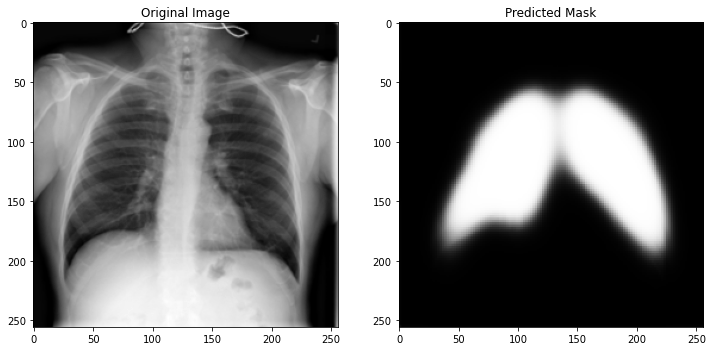

In [2]:
#t2latest
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.backend import flatten, sum

# Define categories
categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

# Dice loss function
def dice_loss(y_true, y_pred):
    y_true_f = flatten(y_true)
    y_pred_f = flatten(y_pred)
    intersection = sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + 1) / (sum(y_true_f) + sum(y_pred_f) + 1)

# Combined loss function
def combined_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return bce + dice

# Function to preprocess a single image for segmentation
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale image
    image = cv2.resize(image, (256, 256))  # Resize image to 256x256
    image = image / 255.0  # Normalize pixel values
    image = np.stack((image,)*3, axis=-1)  # Replicate grayscale channel to 3 channels
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Load the saved segmentation model
model = load_model('unet_resnet50_segmentation_model', custom_objects={'combined_loss': combined_loss, 'dice_loss': dice_loss})

# Test image path (change this to the path of the image you want to test)
test_image_path = 'final_model/lungo-in.png'

# Preprocess the test image
preprocessed_image = preprocess_image(test_image_path)

# Predict the segmentation mask of the test image
predicted_mask = model.predict(preprocessed_image)
predicted_mask = np.squeeze(predicted_mask, axis=0)  # Remove batch dimension
predicted_mask = np.squeeze(predicted_mask, axis=-1)  # Remove channel dimension

# Display the test image and the predicted mask
original_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
original_image = cv2.resize(original_image, (256, 256))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Predicted Mask')
plt.imshow(predicted_mask, cmap='gray')

plt.show()


In [1]:
#t1latest
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model

# Define categories
categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

# Function to preprocess a single image
def preprocess_image(image_path, mask_path=None):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale image
    if mask_path:
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load the mask
        if mask is not None:
            image = apply_mask(image, mask)  # Apply the mask to the image
    image = cv2.resize(image, (256, 256))  # Resize image to 256x256
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=-1)  # Expand dimensions to (256, 256, 1)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to apply mask
def apply_mask(image, mask):
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))  # Resize mask to match image size
    return cv2.bitwise_and(image, image, mask=mask)

# Load the saved model
model = load_model('final_modellatestt1')

# Test image path (change this to the path of the image you want to test)
test_image_path = 'final_model/lungo-in.png'
test_mask_path = 'final_model/lungo-in.png'  # Optional, if you have a mask for the test image

# Preprocess the test image
preprocessed_image = preprocess_image(test_image_path, test_mask_path)

# Predict the class of the test image
predictions = model.predict(preprocessed_image)
predicted_class = categories[np.argmax(predictions)]

# Print the predicted class
print(f"Predicted class: {predicted_class}")


2024-06-20 20:20:29.015443: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 20:20:29.757214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 60577 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


ValueError: in user code:

    File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model" (type Functional).
    
    Input 0 of layer "conv1_conv" is incompatible with the layer: expected axis -1of input shape to have value 3, but received input with shape (None, 262, 262, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 256, 256, 1), dtype=float32)
      • training=False
      • mask=None


In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model (use the appropriate path and format)
model = load_model('final_modellatestt1', custom_objects={'Precision': tf.keras.metrics.Precision, 'Recall': tf.keras.metrics.Recall})

# Define categories (ensure this matches the order used during training)
categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

# Function to preprocess the image
def preprocess_image(image_path, mask_path=None):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if mask_path:
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load the mask if available
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))  # Resize mask to match image size
        image = cv2.bitwise_and(image, image, mask=mask)  # Apply the mask to the image
    
    image = cv2.resize(image, (256, 256))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Example usage:
image_path = 'final_model/Normal-11.png'
#mask_path = 'final_model/covmv.png'  # Optional, set to None if no mask
image = preprocess_image(image_path)#, mask_path)

# Print preprocessed image shape and values
print(f"Preprocessed image shape: {image.shape}")
print(f"Preprocessed image values: {image[0, :, :, 0]}")  # Print the first channel values for debugging

# Predict using the model
predictions = model.predict(image)

# Print predictions
print(f"Predictions: {predictions}")

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Map the predicted class index to the category
predicted_class = categories[predicted_class_index]
print(f"Predicted class: {predicted_class}")


2024-06-20 20:29:16.179662: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 20:29:16.952826: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 60577 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


Preprocessed image shape: (1, 256, 256, 3)
Preprocessed image values: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


2024-06-20 20:29:24.608059: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


Predictions: [[0.16891953 0.7358766  0.04132675 0.05387713]]
Predicted class: Lung_Opacity


2024-06-20 20:29:26.170001: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


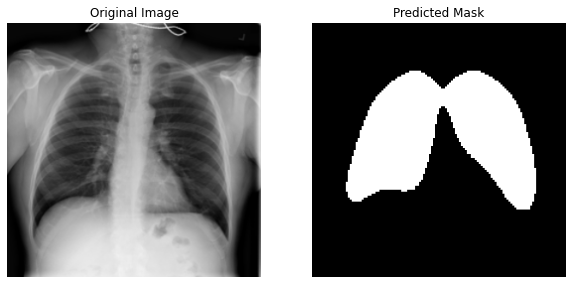

In [2]:
#t2
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Custom loss functions
def dice_loss(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + 1) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + 1)

def combined_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return bce + dice

# Load the model (HDF5 format)
model = load_model('best_modelt2.h5', custom_objects={'dice_loss': dice_loss, 'combined_loss': combined_loss})

# Alternatively, load the model (SavedModel format)
# model = load_model('final_segmentation_model', custom_objects={'dice_loss': dice_loss, 'combined_loss': combined_loss})

# Preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (256, 256))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Example usage
image_path = 'final_model/lungo-in.png'
image = preprocess_image(image_path)

# Make predictions
prediction = model.predict(image)

# The output will be the predicted mask
predicted_mask = np.squeeze(prediction, axis=0)  # Remove batch dimension
predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Threshold the mask

# Display the results
def display_results(image_path, predicted_mask):
    original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    original_image = cv2.resize(original_image, (256, 256))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Predicted Mask')
    plt.imshow(predicted_mask, cmap='gray')
    plt.axis('off')

    plt.show()

# Example usage
display_results(image_path, predicted_mask)


In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model (use the appropriate path and format)
model = load_model('best_modelj25.h5', custom_objects={'Precision': tf.keras.metrics.Precision, 'Recall': tf.keras.metrics.Recall})

# Define categories
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral_Pneumonia']

# Function to preprocess the image
def preprocess_image(image_path, mask_path=None):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if mask_path:
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load the mask if available
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))  # Resize mask to match image size
        image = cv2.bitwise_and(image, image, mask=mask)  # Apply the mask to the image
    
    image = cv2.resize(image, (256, 256))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Example usage:
image_path = 'final_model/coviv.png'
mask_path = 'final_model/covmv.png'  # Optional, set to None if no mask
image = preprocess_image(image_path, mask_path)

# Print preprocessed image shape and values
print(f"Preprocessed image shape: {image.shape}")
print(f"Preprocessed image values: {image[0, :, :, 0]}")  # Print the first channel values for debugging

# Predict using the model
predictions = model.predict(image)

# Print predictions
print(f"Predictions: {predictions}")

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {categories[predicted_class[0]]}")


2024-06-25 01:01:17.601421: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 01:01:18.389972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 60577 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:87:00.0, compute capability: 8.0


Preprocessed image shape: (1, 256, 256, 3)
Preprocessed image values: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


2024-06-25 01:01:23.181945: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


Predictions: [[0.0173326  0.01428548 0.01438536 0.95399654]]
Predicted class: Viral_Pneumonia


2024-06-25 01:01:24.787383: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model (use the appropriate path and format)
model = load_model('final_model', custom_objects={'Precision': tf.keras.metrics.Precision, 'Recall': tf.keras.metrics.Recall})

# Define categories
categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

# Function to preprocess the image
def preprocess_image(image_path, mask_path=None):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if mask_path and os.path.exists(mask_path):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load the mask if available
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))  # Resize mask to match image size
        image = cv2.bitwise_and(image, image, mask=mask)  # Apply the mask to the image
    
    image = cv2.resize(image, (256, 256))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Example usage:
image_path = 'final_model/coviv.png'  # Ensure this path is correct
mask_path = 'final_model/covmv.png'  # Optional, set to None if no mask

try:
    image = preprocess_image(image_path, mask_path)

    # Predict using the model
    predictions = model.predict(image)

    # Get the predicted class
    predicted_class = np.argmax(predictions, axis=1)
    print(f"Predicted class: {categories[predicted_class[0]]}")
except Exception as e:
    print(f"Error: {e}")


Predicted class: Viral_Pneumonia
